# Phase 3 : EDA  

#### Exploratory Data Analysis

GOALS : 

DATA : collect raw data ( three csv files and convert into one dataframe ), covert the data into structured format, a unified dataframe.

DATA PREPROCESSING : inspecting the data, understanding features present in data and understanding its datatypes.

DATA TRANSFORMATION : treating if there are missing values, duplicates and derivation of new attributes.

PERFORMING STATISTICAL AND GRAPHICAL ANALYSIS : to gain insights into the processed data and document the detailed observations for each aspect of analysis.

# Phase 4 : MODELING 

OBJECTIVE : Develop machine learning code to make predictions of rental price and area.

-To make two predictions
1. Rental Price (regression)
2. Area (regression)

GOALS :

-selection of ML algorithm based on EDA.

-data standardization and normalization.

-creation of train and test data sets with optimum parameters.

-model training.

-calculation of model accuracy.

-hyperparameter tuning to achieve better accuracy.

-saving the best performing models based on thorough evaluation.


### ***IMPORTING NECESSARY LIBRARIES***

In [1]:
# Data Analysis & Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessor, Scaler, Sampler
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation & Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

#Saving Model
import pickle

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

#### Importing the data from csv files

In [2]:
table1 = pd.read_csv('TABLE1.csv')
table2 = pd.read_csv('TABLE2.csv')
table3 = pd.read_csv('TABLE3.csv')

#### Creating a unified dataframe of 3 csv files.

In [3]:
df = pd.concat([table1, table2, table3], axis=1)

## DATA INSPECTION

In [4]:
df.head()

,Unnamed: 0,S_No,Address,City,State_code,Country,Rental_Price,Deposit,Unnamed: 0,S_No,...,Unnamed: 0,S_No,Washer/Dryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,Storage
0,0,0,"Location\nPamposh Enclave, Delhi",Delhi,7,India,₹ 2 Lac,Semi-Furnished,0,0,...,0,0,NaN,NaN,Power Backup,-,NaN,NaN,NaN,-
1,1,1,"Location\nSector 18B, Dwarka, Delhi",Delhi,7,India,"₹ 45,000","90,000",1,1,...,1,1,NaN,NaN,Lift,-,NaN,NaN,NaN,Ready to Move
2,2,2,"Location\nDwarka Sector 19, Dwarka, Delhi",Delhi,7,India,"₹ 35,000","70,000",2,2,...,2,2,NaN,NaN,Car Parking,Security / Fire Alarm,NaN,NaN,NaN,Semi-Furnished
3,3,3,"Location\nShivaji Marg, Delhi",Delhi,7,India,Call for Price,"16,000",3,3,...,3,3,NaN,NaN,Power Backup,-,NaN,NaN,NaN,Semi-Furnished
4,4,4,"Location\nChittaranjan Park, Delhi",Delhi,7,India,"₹ 45,000","90,000",4,4,...,4,4,NaN,NaN,Car Parking,-,NaN,NaN,NaN,Unfurnished


In [5]:
df.tail()

,Unnamed: 0,S_No,Address,City,State_code,Country,Rental_Price,Deposit,Unnamed: 0,S_No,...,Unnamed: 0,S_No,Washer/Dryer,AC,Parking,Fireplace,Dishwasher,Hardwoodfloors,Roofdeck,Storage
8763,515,8763,"Location\nBhatar, Surat",Surat,395003,India,Call for Price,"30,000",515,8763,...,515,8763,NaN,NaN,Power Backup,-,NaN,NaN,NaN,Ready to Move
8764,516,8764,"Location\nAlthan, Surat",Surat,395003,India,Call for Price,"45,000",516,8764,...,516,8764,NaN,NaN,Power Backup,Vastu Compliant,NaN,NaN,NaN,Semi-Furnished
8765,517,8765,"Location\nVesu, Surat",Surat,395003,India,Call for Price,"75,000",517,8765,...,517,8765,NaN,NaN,Power Backup,-,NaN,NaN,NaN,Ready to Move
8766,518,8766,"Location\nPalanpur Gam, Surat",Surat,395003,India,Call for Price,"30,000",518,8766,...,518,8766,NaN,NaN,Car Parking,-,NaN,NaN,NaN,Ready to Move
8767,519,8767,"Location\nPunagam, Surat",Surat,395003,India,Call for Price,"12,000",519,8767,...,519,8767,NaN,NaN,-,-,NaN,NaN,NaN,Individual


## DATA DESCRIPTION

In [6]:
df.shape

(8768, 24)

In [7]:
print('We have {} rows and {} columns in our dataframe'.format(*df.shape))
print('\n')

We have 8768 rows and 24 columns in our dataframe




In [8]:
print('Columns in our dataframe are:\n', df.columns)

Columns in our dataframe are:
 Index(['Unnamed: 0', 'S_No', 'Address', 'City', 'State_code', 'Country',
       'Rental_Price', 'Deposit', 'Unnamed: 0', 'S_No', 'No_of_beds',
       'No_of_baths', 'Area', 'Pets_allowed', 'Unnamed: 0', 'S_No',
       'Washer/Dryer', 'AC', 'Parking', 'Fireplace', 'Dishwasher',
       'Hardwoodfloors', 'Roofdeck', 'Storage'],
      dtype='object')


Observations :

As we can see in our columns 'Unnamed: 0' and 'S_No' is repetative and doesnt have any meaningfull values so we can drop those columns.

In [9]:
#dropping the columns using index values of the columns

df.drop(columns=['Unnamed: 0','S_No'],axis=1,inplace=True)

In [10]:
#After dropping the columns

df.shape

(8768, 18)

### DATA TYPES

In [11]:
df.dtypes

Address            object
City               object
State_code          int64
Country            object
Rental_Price       object
Deposit            object
No_of_beds         object
No_of_baths        object
Area               object
Pets_allowed      float64
Washer/Dryer      float64
AC                float64
Parking            object
Fireplace          object
Dishwasher        float64
Hardwoodfloors    float64
Roofdeck          float64
Storage            object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         8768 non-null   object 
 1   City            8768 non-null   object 
 2   State_code      8768 non-null   int64  
 3   Country         8768 non-null   object 
 4   Rental_Price    8768 non-null   object 
 5   Deposit         8768 non-null   object 
 6   No_of_beds      8768 non-null   object 
 7   No_of_baths     8768 non-null   object 
 8   Area            8768 non-null   object 
 9   Pets_allowed    0 non-null      float64
 10  Washer/Dryer    0 non-null      float64
 11  AC              0 non-null      float64
 12  Parking         8768 non-null   object 
 13  Fireplace       8768 non-null   object 
 14  Dishwasher      0 non-null      float64
 15  Hardwoodfloors  0 non-null      float64
 16  Roofdeck        0 non-null      float64
 17  Storage         8768 non-null   o

#### Observations :

- Our data have 8768 rows and 18 columns.

- The data frame consists of three datatypes ie object(11), integer(1) and float(6) values.

- we can clearly see there are missing values in out data frame.

- Our data is related to rentals available in various cities.


### TREATING MISSING VALUES

In [13]:
#checking the missing values in our data set

df.isnull().sum()

Address              0
City                 0
State_code           0
Country              0
Rental_Price         0
Deposit              0
No_of_beds           0
No_of_baths          0
Area                 0
Pets_allowed      8768
Washer/Dryer      8768
AC                8768
Parking              0
Fireplace            0
Dishwasher        8768
Hardwoodfloors    8768
Roofdeck          8768
Storage              0
dtype: int64

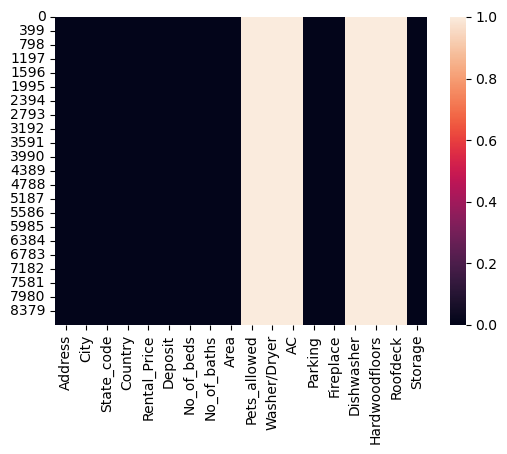

In [14]:
#Visualizing it
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.show()

Observations :

columns pets allowed, washer/dryer, ac, dishwasher, hardwoodfloors, roofdeck are empty columns.

- we can drop this columns as these are the amenities provided by the property and data in this columns is unknown, irrelevant, or not applicable. we have other amenities present in our dataset, we can use those for further analysis of our data.

In [15]:
#dropping empty columns

df.drop(columns=['Pets_allowed','Washer/Dryer','AC','Dishwasher','Hardwoodfloors','Roofdeck'],axis=1,inplace=True)

In [16]:
df.shape

(8768, 12)

### DATA EXPLORATION

In [17]:
#Let check if any whitespace, 'NA' or '-' exist in dataset
df.isin([' ','NA','-']).any()

Address         False
City             True
State_code      False
Country         False
Rental_Price     True
Deposit          True
No_of_beds       True
No_of_baths      True
Area             True
Parking          True
Fireplace        True
Storage          True
dtype: bool

In [18]:
# Replacing those values with NAN
df = df.replace([' ', 'NA', '-', ' ?'], np.NaN)

In [19]:
df.isin([' ','NA','-',' ?']).any()

Address         False
City            False
State_code      False
Country         False
Rental_Price    False
Deposit         False
No_of_beds      False
No_of_baths     False
Area            False
Parking         False
Fireplace       False
Storage         False
dtype: bool

In [20]:
#now checking missing values again

df.isnull().sum()

Address            0
City               1
State_code         0
Country            0
Rental_Price       1
Deposit           50
No_of_beds         2
No_of_baths       44
Area            1488
Parking         1206
Fireplace       7010
Storage          248
dtype: int64

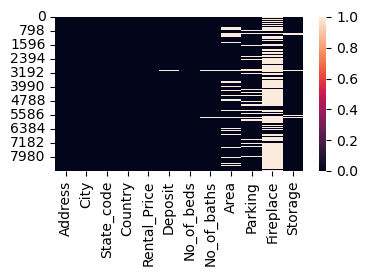

In [21]:
#Visualizing it
plt.figure(figsize=(4,2))
sns.heatmap(df.isnull())
plt.show()

### Unique Values in our dataframe

In [22]:
# Checking Unique values in columns
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('*'*50)

Address
['Location\nPamposh Enclave, Delhi' 'Location\nSector 18B, Dwarka, Delhi'
 'Location\nDwarka Sector 19, Dwarka, Delhi'
 'Location\nShivaji Marg, Delhi' 'Location\nChittaranjan Park, Delhi'
 'Location\nChattarpur Extension, Chattarpur, Delhi'
 'Location\nDwarka Sector 8, Dwarka, Delhi'
 'Location\nBlock G, Pul Pehlad Pur, Delhi'
 'Location\nJangpura, Jungpura Extension, Jangpura, Delhi'
 'Location\nCivil Lines, Delhi' 'Location\nSector 22, Dwarka, Delhi'
 'Location\nNew Moti Nagar, Delhi' 'Location\nChattarpur Extension, Delhi'
 'Location\nSouth Extension, Kidwai Nagar, South Extension, Delhi'
 'Location\nBlock B, Kalkaji, Delhi' 'Location\nGreater Kailash II, Delhi'
 'Location\nChattarpur, Hargobind Enclave, Chattarpur, Delhi'
 'Location\nGovind Puri, Delhi' 'Location\nGovind Puri Extension, Delhi'
 'Location\nRohini Sector 8, Rohini, Delhi'
 'Location\nRohini Sector 16, Rohini, Delhi'
 'Location\nSarita Vihar, Pocket G, Sarita Vihar, Delhi'
 'Location\nDwarka Sector 10, Dwarka

In [23]:
# Checking value counts 
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('*'*50)

Address
Location\nJagatpura, Jaipur                      90
Location\nSector 137, Noida                      78
Location\nNipania, Indore                        78
Location\nVesu, Surat                            65
Location\nGomti Nagar Extension, Lucknow         60
                                                 ..
Location\nNew Barrakpur, Kolkata                 10
Location\nChokkanahalli, Bangalore                9
Location\nJodhpur Road, Ahmedabad, Gujarat        1
Location\nChokkanahalli, Bangalore, Karnataka     1
Location\nErandwana, Pune, Maharashtra            1
Name: Address, Length: 576, dtype: int64
**************************************************
City
Hyderabad    638
Ahmedabad    623
Mumbai       600
Gurgaon      600
Noida        600
Bangalore    600
Kolkata      600
Jaipur       600
Lucknow      600
Chennai      590
Delhi        570
Nagpur       560
Pune         546
Indore       520
Surat        520
Name: City, dtype: int64
*******************************************

OBSERVATIONS :

now our data set contains 8768 columns and 11 rows after removal of redundant columns.

***Address***          : location of the property in text format. we dont have any null values present in this column

***City***             : this columns suggests the name of the city, where the property is located.

***State_code***       : it assigns unique statecode of the city in numerical value, where the property is located, it doesnt have null values.

***Country***          : name of the country, it has a unique value in this column, ie 'india'.

***Rental_Price***     : Amount of rent to paid, it includes both numeric values with currency symbols and prefix ie Lac or Cr. Some entries may need preprocessing to ensure uniform formatting.

***Deposit***          : amount to be paid for booking, it has null values which needs to be treated.

***No_of_beds***       : shows the number of bedrooms available in the property. This column has some unusual entries in two digits - four digits which should be treated along with null values present.

***No_of_baths***      : shows the number of bathrooms in the property.This column has some unusual entries in two digits - four digits which should be treated along with null values present.

***Area***             : describes area of rental property in sq.mts, it also have null values which needs to be removed.

***Parking***          : this column shows weather the property has parking available. it also have other values init which can be other amenities present in the property. we will change the values and treat nulls as well.

***Fireplace***        : this column shows weather property has fire alert or no, it also have other values init which can be other amenities present in the property. we will change the values and treat nulls as well.

***Storage***          : shows weather property has built in storage systems (furnished or unfurnished or semi-furnished) it also have other values init which can be other amenities present in the property. it has some numerical data, we will change this numerical values to nulls and treat nulls as well.

## Handling the data column wise

##### 1. Handling 'address' column

In [24]:
df['Address'].unique()

array(['Location\nPamposh Enclave, Delhi',
       'Location\nSector 18B, Dwarka, Delhi',
       'Location\nDwarka Sector 19, Dwarka, Delhi',
       'Location\nShivaji Marg, Delhi',
       'Location\nChittaranjan Park, Delhi',
       'Location\nChattarpur Extension, Chattarpur, Delhi',
       'Location\nDwarka Sector 8, Dwarka, Delhi',
       'Location\nBlock G, Pul Pehlad Pur, Delhi',
       'Location\nJangpura, Jungpura Extension, Jangpura, Delhi',
       'Location\nCivil Lines, Delhi',
       'Location\nSector 22, Dwarka, Delhi',
       'Location\nNew Moti Nagar, Delhi',
       'Location\nChattarpur Extension, Delhi',
       'Location\nSouth Extension, Kidwai Nagar, South Extension, Delhi',
       'Location\nBlock B, Kalkaji, Delhi',
       'Location\nGreater Kailash II, Delhi',
       'Location\nChattarpur, Hargobind Enclave, Chattarpur, Delhi',
       'Location\nGovind Puri, Delhi',
       'Location\nGovind Puri Extension, Delhi',
       'Location\nRohini Sector 8, Rohini, Delhi',


In [25]:
df['Address']=df['Address'].str.replace("\n"," ")
df['Address']=df['Address'].str.replace("Location"," ")
df['Address']=df['Address'].str.replace(","," ")

In [26]:
df['Address']

0                  Pamposh Enclave  Delhi
1               Sector 18B  Dwarka  Delhi
2         Dwarka Sector 19  Dwarka  Delhi
3                     Shivaji Marg  Delhi
4                Chittaranjan Park  Delhi
                      ...                
8763                        Bhatar  Surat
8764                        Althan  Surat
8765                          Vesu  Surat
8766                  Palanpur Gam  Surat
8767                       Punagam  Surat
Name: Address, Length: 8768, dtype: object

##### 2. Handling 'city' column

In [27]:
df['City'].unique()

array(['Delhi', 'Mumbai', 'Gurgaon', 'Noida', 'Bangalore', 'Ahmedabad',
       nan, 'Kolkata', 'Chennai', 'Pune', 'Jaipur', 'Hyderabad',
       'Lucknow', 'Indore', 'Nagpur', 'Surat'], dtype=object)

In [28]:
df['City'].value_counts()

Hyderabad    638
Ahmedabad    623
Mumbai       600
Gurgaon      600
Noida        600
Bangalore    600
Kolkata      600
Jaipur       600
Lucknow      600
Chennai      590
Delhi        570
Nagpur       560
Pune         546
Indore       520
Surat        520
Name: City, dtype: int64

In [29]:
df['City'].fillna(df['City'].mode()[0], inplace=True)

##### 3. Handling 'State_code' column

In [30]:
df['State_code'].unique()

array([     7,     22,    124,    120,     80,     79,     33,     20,
          141,     40,    522,    731,    712, 395003], dtype=int64)

In [31]:
df['State_code'].value_counts()

33        1190
40         638
79         624
22         600
124        600
120        600
80         600
141        600
522        600
7          570
712        560
20         546
731        520
395003     520
Name: State_code, dtype: int64

##### 4. Handling 'country column

In [32]:
df['Country'].unique()

array(['India'], dtype=object)

##### 5. Handling 'Rental_price' column

In [33]:
df['Rental_Price'].value_counts()

Call for Price    1087
₹ 20,000           452
₹ 10,000           371
₹ 15,000           368
₹ 12,000           326
                  ... 
₹ 49,000            10
₹ 52,000            10
₹ 48,000            10
₹ 19,300            10
₹ 4 Lac             10
Name: Rental_Price, Length: 120, dtype: int64

In [34]:
#replacing the 'call for price' to null 

df['Rental_Price'] = df['Rental_Price'].replace(['Call for Price'], np.NaN)

In [35]:
#replacing the unusual characters and changing the values of amount present in the data to make it more precise

df['Rental_Price'] = df['Rental_Price'].str.replace("₹","")
df['Rental_Price'] = df['Rental_Price'].str.replace("Lac","00,000")
df['Rental_Price'] = df['Rental_Price'].str.replace("Cr.","0,000,000")
df['Rental_Price'] = df['Rental_Price'].str.replace(",","")
df['Rental_Price'] = df['Rental_Price'].str.replace(" ","")

In [36]:
#treating nulls 
df['Rental_Price'].fillna(df['Rental_Price'].mode()[0], inplace=True)

#changing the datatype to remove decimals from the data
df['Rental_Price'] = df['Rental_Price'].astype(float)

#removing decimals and changing to nearest value
df['Rental_Price']=np.ceil(df['Rental_Price'])

In [37]:
df['Rental_Price'].value_counts()

20000.0      1540
10000.0       371
15000.0       368
12000.0       326
25000.0       294
             ... 
41.0           10
8000000.0      10
29500.0        10
8300.0         10
52000.0        10
Name: Rental_Price, Length: 108, dtype: int64

##### 6. Handling 'Deposit column

In [38]:
df['Deposit']

0       Semi-Furnished
1               90,000
2               70,000
3               16,000
4               90,000
             ...      
8763            30,000
8764            45,000
8765            75,000
8766            30,000
8767            12,000
Name: Deposit, Length: 8768, dtype: object

In [39]:
#replacing character ',' to seperate text and numerical values
df['Deposit']=df['Deposit'].str.replace(",","")

In [40]:
df['Numeric Answers'] = pd.to_numeric(df['Deposit'], errors='coerce')
mask = df['Numeric Answers'].isna()
df.loc[mask, 'FreeText Answers'] = df.loc[mask, 'Deposit']
df.drop(columns=['Deposit'])

,Address,City,State_code,Country,Rental_Price,No_of_beds,No_of_baths,Area,Parking,Fireplace,Storage,Numeric Answers,FreeText Answers
0,Pamposh Enclave Delhi,Delhi,7,India,200000.0,4,2800,NaN,Power Backup,NaN,NaN,NaN,Semi-Furnished
1,Sector 18B Dwarka Delhi,Delhi,7,India,45000.0,4,3,1850,Lift,NaN,Ready to Move,90000.0,NaN
2,Dwarka Sector 19 Dwarka Delhi,Delhi,7,India,35000.0,3,3,1600,Car Parking,Security / Fire Alarm,Semi-Furnished,70000.0,NaN
3,Shivaji Marg Delhi,Delhi,7,India,20000.0,1,1,365,Power Backup,NaN,Semi-Furnished,16000.0,NaN
4,Chittaranjan Park Delhi,Delhi,7,India,45000.0,2,2,1125,Car Parking,NaN,Unfurnished,90000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,Bhatar Surat,Surat,395003,India,20000.0,2,1,900,Power Backup,NaN,Ready to Move,30000.0,NaN
8764,Althan Surat,Surat,395003,India,20000.0,2,2,1100,Power Backup,Vastu Compliant,Semi-Furnished,45000.0,NaN
8765,Vesu Surat,Surat,395003,India,20000.0,3,3,2000,Power Backup,NaN,Ready to Move,75000.0,NaN
8766,Palanpur Gam Surat,Surat,395003,India,20000.0,2,2,1170,Car Parking,NaN,Ready to Move,30000.0,NaN


In [41]:
df.drop(columns=['FreeText Answers'],axis=1,inplace=True) #dropping the text column

In [42]:
df.drop(columns=['Deposit'],axis=1,inplace=True) #droping the original deposit column

In [43]:
#renaming our new numerical values column
df.rename(columns = {'Numeric Answers':'Deposit'}, inplace = True) 

In [44]:
#treating nulls
df['Deposit'].fillna(df['Deposit'].mode()[0], inplace=True)

##### 7. Handling 'no_of_beds' column

In [45]:
df['No_of_beds'].unique()

array(['4', '3', '1', '2', '5', '6', nan, '105', '162', '7820', '7'],
      dtype=object)

In [46]:
#replacing the values with spaces
df['No_of_beds'] = df['No_of_beds'].replace({'105':' ', '162':' ', '7820':' '}, regex=True)

#coverting spaces into nulls
df['No_of_beds'] = df['No_of_beds'].replace([' '], np.NaN)

#treating nulls
df['No_of_beds'].fillna(df['No_of_beds'].mode()[0], inplace=True)

In [47]:
df['No_of_beds'].unique()

array(['4', '3', '1', '2', '5', '6', '7'], dtype=object)

##### 8. Handling 'no_of_baths' column

In [48]:
df['No_of_baths'].unique()

array(['2800', '3', '1', '2', '1100', '75', '912', '550', '600', '535',
       '5', '4995', '6', '4', '1894', '10', '1255', '880', nan, '245',
       '130', '630', '800', '2000', '1575', '100', '1340', '2200', '7',
       '1890'], dtype=object)

In [49]:
#replacing the values more than 10 to nulls
df['No_of_baths'] = df['No_of_baths'].replace(['2800','1100','75','912','550','600','535','4995','1894','10','1255','880','245','130','630','800','2000','1575','100','1340','2200','1890'], np.NaN)

#treating nulls
df['No_of_baths'].fillna(df['No_of_baths'].mode()[0], inplace=True)

In [50]:
df['No_of_baths'].unique()

array(['2', '3', '1', '5', '6', '4', '7'], dtype=object)

##### 9. Handling 'Area' column

In [51]:
df['Area'].unique()

array([nan, '1850', '1600', '365', '1125', '600', '700', '200', '2100',
       '1500', '1566', '1200', '400', '750', '800', '450', '650', '900',
       '1250', '1000', '100', '70', '820', '480', '500', '550', '940',
       '685', '850', '651', '780', '4560', '610', '1150', '620', '1495',
       '1100', '635', '410', '560', '495', '2710', '1800', '1885', '1508',
       '1415', '1450', '2890', '2382', '5800', '2985', '1490', '2800',
       '1400', '1330', '2000', '4000', '5300', '2500', '1822', '20',
       '1750', '3100', '2550', '1940', '2050', '476', '4022', '210',
       '594', '1310', '2200', '2538', '1427', '1095', '790', '2190',
       '1090', '2', '890', '595', '6010', '655', '1015', '1520', '1082',
       '505', '920', '2912', '1732', '420', '1325', '988', '1070', '1759',
       '1202', '515', '1595', '2385', '4005', '990', '950', '2324',
       '2400', '1207', '770', '1097', '604', '1918', '1485', '645',
       '1230', '1300', '1048', '760', '1496', '4800', '1350', '1809',
    

In [52]:
#treating nulls
df['Area'].fillna(df['Area'].median(), inplace=True)

##### 10. Handling 'Parking' column

In [53]:
df['Parking'].unique()

array(['Power Backup', 'Lift', 'Car Parking', nan, 'Intercom',
       '24 x 7 Security', 'Water Storage', 'Maintenance Staff',
       'Vastu Compliant', 'Fitness Centre/Gym'], dtype=object)

In [54]:
df['Parking'].value_counts()

Car Parking           3483
Power Backup          2918
Lift                   691
Water Storage          209
24 x 7 Security        153
Maintenance Staff       67
Vastu Compliant         20
Fitness Centre/Gym      11
Intercom                10
Name: Parking, dtype: int64

In [55]:
#Categorical Values

#first filling nulls present
constant_value = 0
df['Parking'].fillna(constant_value, inplace=True)

#replacing all the values with 1
df['Parking'] = df['Parking'].replace({'Car Parking':1, 'Power Backup':1, 'Lift':1, 'Water Storage':1, '24 x 7 Security':1, 'Maintenance Staff':1, 'Vastu Compliant':1,'Fitness Centre/Gym':1, 'Intercom':1}, regex=True)

In [56]:
df['Parking'].unique()

array([1, 0], dtype=int64)

##### 11. Handling 'Fireplace' column

In [57]:
df['Fireplace'].unique()

array([nan, 'Security / Fire Alarm', 'Water Purifier', 'Piped Gas',
       'Cafeteria', 'Maintenance Staff', 'Vastu Compliant', 'Park',
       'Swimming Pool', 'Wi-Fi Connectivity'], dtype=object)

In [58]:
df['Fireplace'].value_counts()

Maintenance Staff        913
Vastu Compliant          315
Security / Fire Alarm    195
Piped Gas                145
Swimming Pool             73
Wi-Fi Connectivity        57
Park                      35
Water Purifier            15
Cafeteria                 10
Name: Fireplace, dtype: int64

In [59]:
#filling nulls

df['Fireplace'].fillna(0, inplace=True)

df['Fireplace'] = df['Fireplace'].replace({'Maintenance Staff':1, 'Vastu Compliant':1, 'Security / Fire Alarm':1, 'Piped Gas':1,'Swimming Pool':1, 'Wi-Fi Connectivity':1, 'Cafeteria':1,'Park':1, 'Water Purifier':1}, regex=True)

In [60]:
df['Fireplace'].unique()

array([0, 1], dtype=int64)

In [61]:
df['Fireplace'] = df['Fireplace'].astype(int)
df['Parking'] = df['Parking'].astype(int)
df['State_code'] = df['State_code'].astype(int)

##### 12. Handling 'storage' column

In [62]:
df['Storage'].unique()

array([nan, 'Ready to Move', 'Semi-Furnished', 'Unfurnished', 'Agent',
       'Individual', 'East', 'South', '1st', 'North', 'North East',
       '14th', 'Furnished', 'Others', 'South West', '2nd', 'West',
       'Upcoming', '0 to 5 years', 'Resale', 'Builder', 'South East',
       '16th', 'New', '3rd', 'Under Construction', 'North West', 'Ground',
       '5 to 10 years', '10', '4th', '14', '3', '5th', '5', '6th', '4'],
      dtype=object)

In [63]:
df['Storage'].fillna(0, inplace=True)

In [64]:
df['Storage'] = df['Storage'].replace(['Ready to Move', 'Semi-Furnished', 'Unfurnished', 'Agent',
       'Individual', 'East', 'South', '1st', 'North', 'North East',
       '14th', 'Furnished', 'Others', 'South West', '2nd', 'West',
       'Upcoming', '0 to 5 years', 'Resale', 'Builder', 'South East',
       '16th', 'New', '3rd', 'Under Construction', 'North West', 'Ground',
       '5 to 10 years', '10', '4th', '14', '3', '5th', '5', '6th', '4'], np.NaN)

In [65]:
df['Storage'].fillna(1, inplace=True)

In [66]:
df['Storage'].unique()

array([0., 1.])

In [67]:
df['Storage'] = df['Storage'].replace({'1.':1})

In [68]:
df['Storage'] = df['Storage'].astype(int)

CREATING A NEW COLUMN "AMENITIES" AND PLACING THE INFORMATION IN TERMS OF THE VALUES

In [69]:
df['Amenities']=np.ceil(df['Parking']+df['Storage']+df['Fireplace'])

In [70]:
df

,Address,City,State_code,Country,Rental_Price,No_of_beds,No_of_baths,Area,Parking,Fireplace,Storage,Deposit,Amenities
0,Pamposh Enclave Delhi,Delhi,7,India,200000.0,4,2,1125.0,1,0,0,50000.0,1.0
1,Sector 18B Dwarka Delhi,Delhi,7,India,45000.0,4,3,1850,1,0,1,90000.0,2.0
2,Dwarka Sector 19 Dwarka Delhi,Delhi,7,India,35000.0,3,3,1600,1,1,1,70000.0,3.0
3,Shivaji Marg Delhi,Delhi,7,India,20000.0,1,1,365,1,0,1,16000.0,2.0
4,Chittaranjan Park Delhi,Delhi,7,India,45000.0,2,2,1125,1,0,1,90000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,Bhatar Surat,Surat,395003,India,20000.0,2,1,900,1,0,1,30000.0,2.0
8764,Althan Surat,Surat,395003,India,20000.0,2,2,1100,1,1,1,45000.0,3.0
8765,Vesu Surat,Surat,395003,India,20000.0,3,3,2000,1,0,1,75000.0,2.0
8766,Palanpur Gam Surat,Surat,395003,India,20000.0,2,2,1170,1,0,1,30000.0,2.0


In [71]:
#dropping the columns

df.drop(columns=['Fireplace','Parking','Storage',], inplace=True)

In [72]:
df

,Address,City,State_code,Country,Rental_Price,No_of_beds,No_of_baths,Area,Deposit,Amenities
0,Pamposh Enclave Delhi,Delhi,7,India,200000.0,4,2,1125.0,50000.0,1.0
1,Sector 18B Dwarka Delhi,Delhi,7,India,45000.0,4,3,1850,90000.0,2.0
2,Dwarka Sector 19 Dwarka Delhi,Delhi,7,India,35000.0,3,3,1600,70000.0,3.0
3,Shivaji Marg Delhi,Delhi,7,India,20000.0,1,1,365,16000.0,2.0
4,Chittaranjan Park Delhi,Delhi,7,India,45000.0,2,2,1125,90000.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8763,Bhatar Surat,Surat,395003,India,20000.0,2,1,900,30000.0,2.0
8764,Althan Surat,Surat,395003,India,20000.0,2,2,1100,45000.0,3.0
8765,Vesu Surat,Surat,395003,India,20000.0,3,3,2000,75000.0,2.0
8766,Palanpur Gam Surat,Surat,395003,India,20000.0,2,2,1170,30000.0,2.0


In [73]:
df.isnull().sum()

Address         0
City            0
State_code      0
Country         0
Rental_Price    0
No_of_beds      0
No_of_baths     0
Area            0
Deposit         0
Amenities       0
dtype: int64

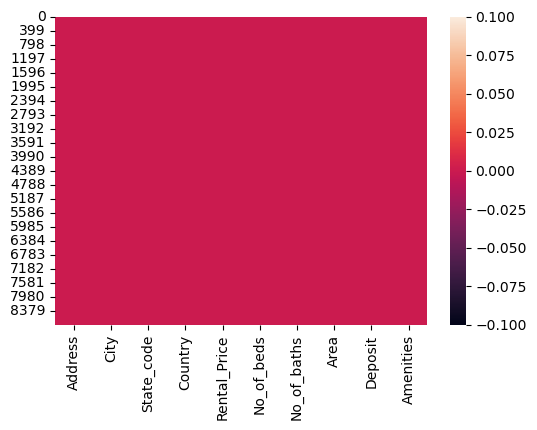

In [74]:
#Visualizing it
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.show()

In [75]:
df.dtypes

Address          object
City             object
State_code        int32
Country          object
Rental_Price    float64
No_of_beds       object
No_of_baths      object
Area             object
Deposit         float64
Amenities       float64
dtype: object

In [76]:
#dropping address column as it is having unique data to each row and it is irrelevant for our analysis.

df.drop(columns=['Address'],inplace=True)

In [77]:
#dropping country column as it has only one unique value, and doesnt have information required for analysis
df.drop(columns=['Country'],inplace=True)

In [78]:
#changing the area dtype

df['Area'] = df['Area'].astype(int)

SEPERATING NUMERICAL AND CATEGORICAL COLUMNS

In [79]:
#Seaparating Categrocial columns in train Dataframe
cat_col = df.select_dtypes(include='object').columns
print("Categorial columns in our train dataframe:\n",cat_col)

#Seaparating Numerical columns in train Dataframe
num_col = df.select_dtypes(include=['int32', 'float64']).columns
print("\nNumerical columns in our train dataframe:\n",num_col)

Categorial columns in our train dataframe:
 Index(['City', 'No_of_beds', 'No_of_baths'], dtype='object')

Numerical columns in our train dataframe:
 Index(['State_code', 'Rental_Price', 'Area', 'Deposit', 'Amenities'], dtype='object')


In [80]:
df.shape

(8768, 8)

In [81]:
df.describe()

,State_code,Rental_Price,Area,Deposit,Amenities
count,8768.000000,8.768000e+03,8768.000000,8768.000000,8768.000000
mean,23598.859033,4.819414e+04,1285.574475,38183.701528,2.034672
std,93261.037873,3.497722e+05,854.140986,20829.151430,0.615330
min,7.000000,2.000000e+00,1.000000,1.000000,0.000000
25%,33.000000,1.200000e+04,890.000000,20000.000000,2.000000
50%,80.000000,2.000000e+04,1125.000000,48000.000000,2.000000
75%,522.000000,2.900000e+04,1450.000000,50000.000000,2.000000
max,395003.000000,8.000000e+06,11000.000000,98000.000000,3.000000


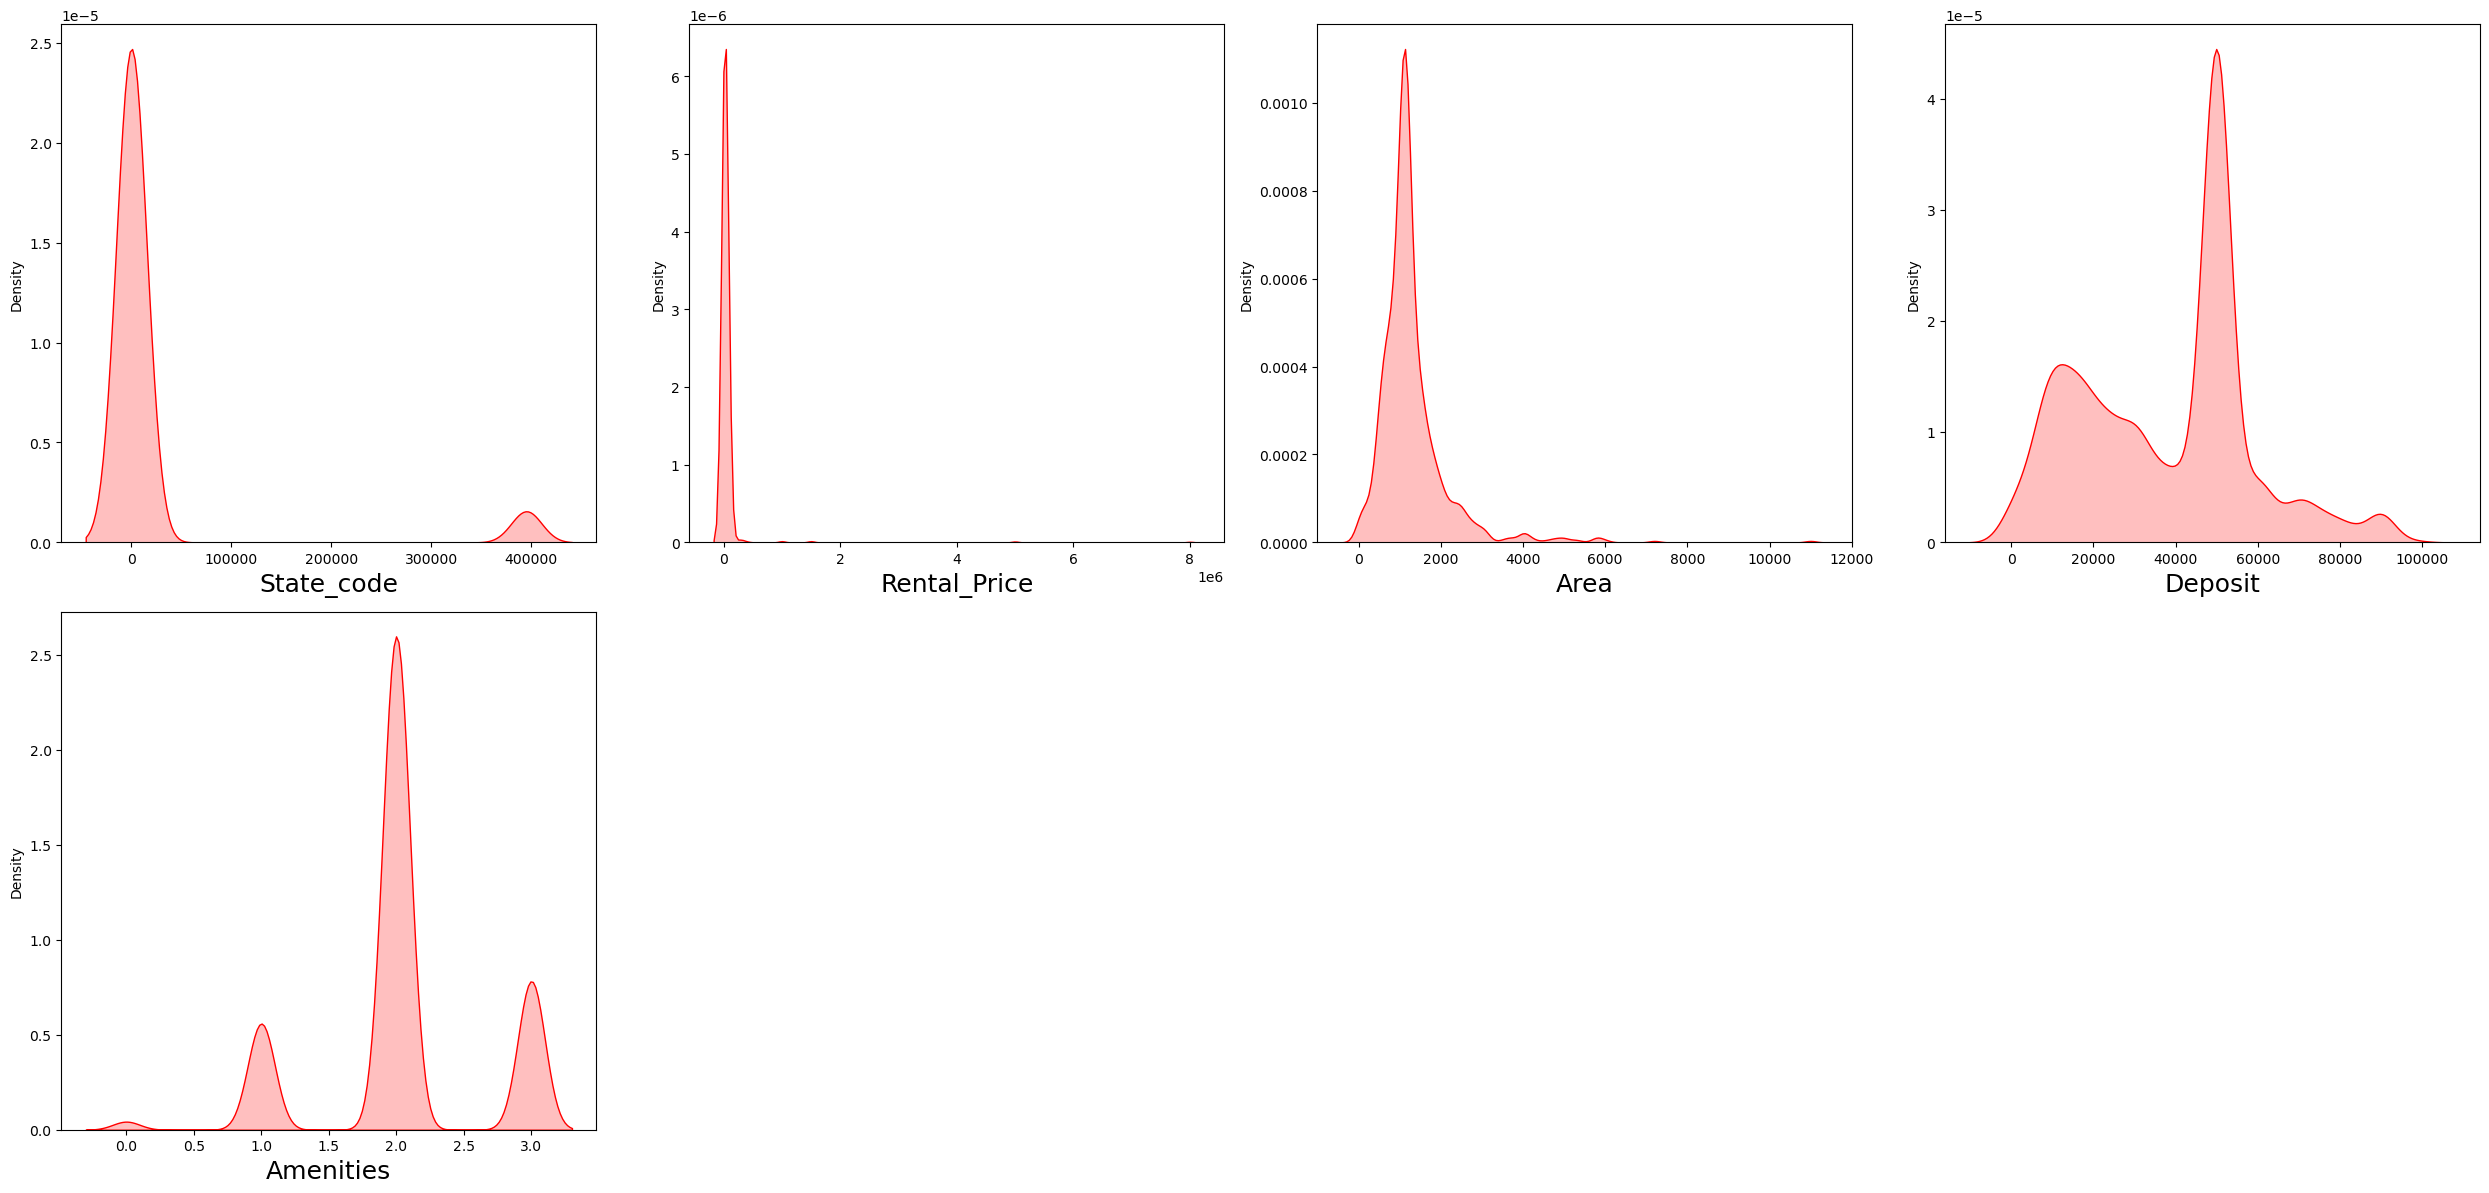

In [82]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="red",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

OBSERVATIONS:

- from the data describtion we can understand that there are some outliers preswent in area and deposit

-rental_price, The prices vary significantly, with a minimum of 200000000 and a maximum of 8000000000

-area, mean is greater than median, showing the data seems to be be right skipped ie positive skipped data

-deposit, The presence of a minimum price of 1 suggests that some items might be missing.

-ameneties, ranges from 0 to 3, with an average count of 3 ameneties. most properties have 2 ameneties, as indicated by the median (50th percentile)

These statistics provide insights into the distribution and central tendency of the selected columns in the dataframe. The presence of minimum prices of 0 and minimum counts of sizes of 0 suggests potential data anomalies or missing information

## DATA VISUALIZATION

### UNIVARIATE ANALYSIS on categorical data


### 1.City

In [83]:
city_counts = df['City'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each shoename
percentage_city = (city_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': city_counts, 'Percentage': percentage_city})
result_df.head(10)

,Count,Percentage
Hyderabad,639,7.287865
Ahmedabad,623,7.105383
Mumbai,600,6.843066
Gurgaon,600,6.843066
Noida,600,6.843066
Bangalore,600,6.843066
Kolkata,600,6.843066
Jaipur,600,6.843066
Lucknow,600,6.843066
Chennai,590,6.729015


### 3. No_of_beds


In [84]:
bed_counts = df['No_of_beds'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each shoename
percentage_beds = (bed_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': bed_counts, 'Percentage': percentage_beds})
result_df.head(10)

,Count,Percentage
2,3730,42.541058
3,2831,32.287865
1,1722,19.639599
4,389,4.436588
5,68,0.775547
6,15,0.171077
7,13,0.148266


### 4.No_of_baths


In [85]:
bath_counts = df['No_of_baths'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each shoename
percentage_bath = (bath_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': bath_counts, 'Percentage': percentage_bath})
result_df.head(10)

,Count,Percentage
2,4558,51.984489
3,1950,22.239964
1,1766,20.141423
4,286,3.261861
5,149,1.699361
6,46,0.524635
7,13,0.148266


Pie plot for the column: City


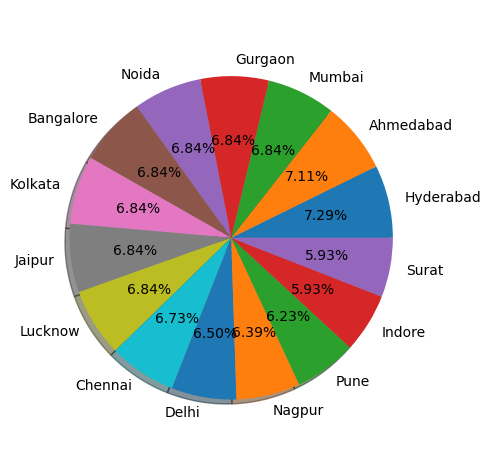

Pie plot for the column: No_of_beds


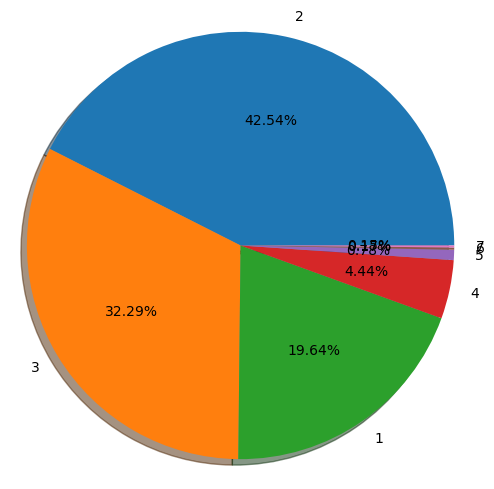

Pie plot for the column: No_of_baths


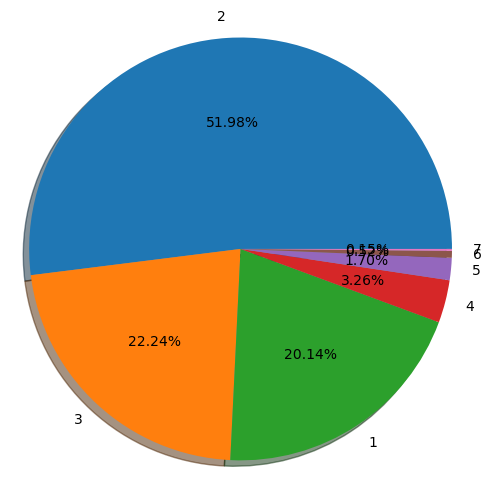

In [86]:
#graphical presentation

def generate_pie(i):
    plt.figure(figsize=(5,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cols1 = ['City','No_of_beds','No_of_baths']


plotnumber=1
for j in df[cols1]:
    print(f"Pie plot for the column:", j)
    generate_pie(df[j])

### UNIVARIATE ANALYSIS ON NUMERICAL COLUMNS

In [87]:
for i in num_col:
    print(i)
    result = df.groupby(i).size().reset_index(name='Count')
    result['Percentage'] = (result['Count'] / len(df)) * 100
    print(result)
    print('=' * 100)

State_code
    State_code  Count  Percentage
0            7    570    6.500912
1           20    546    6.227190
2           22    600    6.843066
3           33   1190   13.572080
4           40    638    7.276460
5           79    624    7.116788
6           80    600    6.843066
7          120    600    6.843066
8          124    600    6.843066
9          141    600    6.843066
10         522    600    6.843066
11         712    560    6.386861
12         731    520    5.930657
13      395003    520    5.930657
Rental_Price
     Rental_Price  Count  Percentage
0             2.0    248    2.828467
1             3.0     25    0.285128
2             4.0     11    0.125456
3             5.0     10    0.114051
4             6.0     15    0.171077
..            ...    ...         ...
103      400000.0     10    0.114051
104     1000000.0     20    0.228102
105     1500000.0     20    0.228102
106     5000000.0     15    0.171077
107     8000000.0     10    0.114051

[108 rows x 3 columns

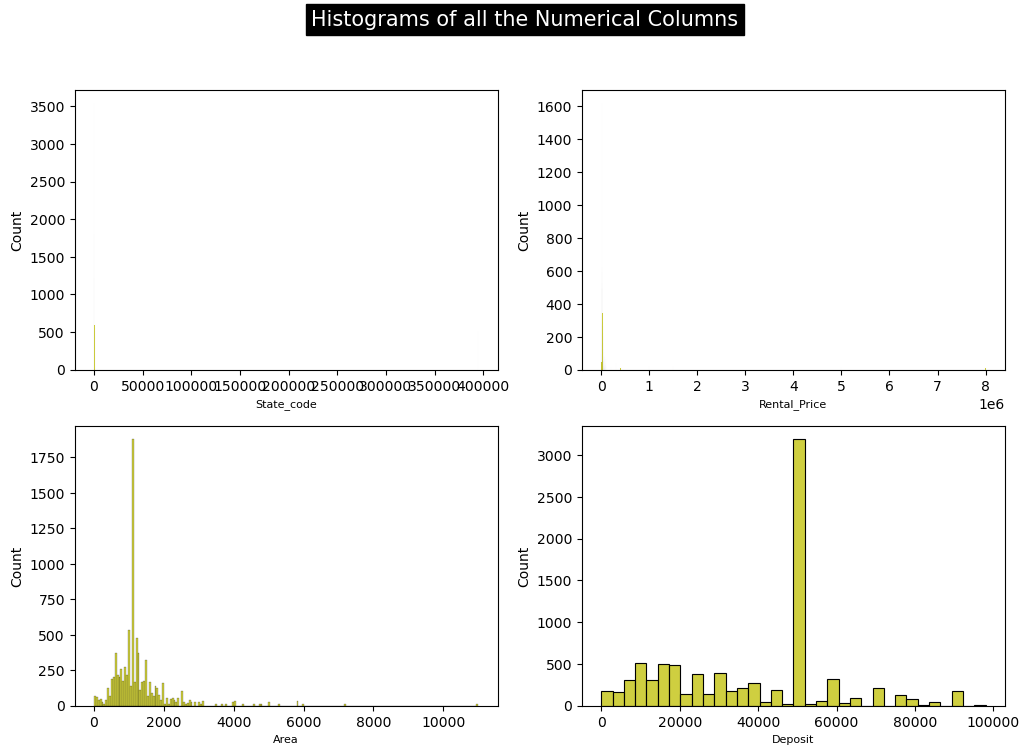

In [88]:
#Visiualizing it using Histogram
plt.figure(figsize=(12,8), facecolor='white')
# Initialize plotnumber for subplot
plotnumber = 1

# Loop through numerical columns and plot histograms
for column in num_col:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.histplot(df[column], color='y')
        plt.xlabel(column, fontsize=8)
    plotnumber += 1
plt.suptitle("Histograms of all the Numerical Columns", fontsize=15, backgroundcolor='black', color='white')
plt.show()

# BIVARIATE ANALYSIS

### 1. comapring first target(rental price) with categorical columns

In [89]:
# Iterate through each categorical column
for col in cat_col:
    
    # Group by 'Price' and the current categorical column
    counts = df.groupby(['Rental_Price', col])[col].count()
    
    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Rental_Price'].count()
    
    # Calculate the percentage of 'Rating' for each category in the current column
    percentages = (counts / total_counts * 100).round(2)
    
    # Create a DataFrame to display the counts and percentages
    cat_df = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Print the results
    print(cat_df)
    print('*'*60)

                        Count  Percentage
Rental_Price City                        
2.0          Ahmedabad     16        2.57
             Bangalore     10        1.67
             Chennai       10        1.69
             Delhi         15        2.63
             Gurgaon      105       17.50
...                       ...         ...
400000.0     Kolkata       10        1.67
1000000.0    Chennai       20        3.39
1500000.0    Chennai       20        3.39
5000000.0    Delhi         15        2.63
8000000.0    Kolkata       10        1.67

[401 rows x 2 columns]
************************************************************
                         Count  Percentage
Rental_Price No_of_beds                   
2.0          1              29        1.68
             3             135        4.77
             4              69       17.74
             5              15       22.06
3.0          3              15        0.53
...                        ...         ...
400000.0     4           

### 2. comapring second target(Area) with categorical columns

In [90]:
# Iterate through each categorical column
for col in cat_col:
    
    # Group by 'Rating' and the current categorical column
    counts = df.groupby(['Area', col])[col].count()
    
    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Area'].count()
    
    # Calculate the percentage of 'Rating' for each category in the current column
    percentages = (counts / total_counts * 100).round(2)
    
    # Create a DataFrame to display the counts and percentages
    cat_df = pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Print the results
    print(cat_df)
    print('*'*60)

               Count  Percentage
Area  City                      
1     Surat       13        2.50
2     Noida       10        1.67
6     Surat       13        2.50
20    Gurgaon     15        2.50
50    Lucknow     15        2.50
...              ...         ...
5300  Gurgaon     15        2.50
5800  Gurgaon     30        5.00
6010  Noida       10        1.67
7200  Chennai     10        1.69
11000 Kolkata     10        1.67

[478 rows x 2 columns]
************************************************************
                  Count  Percentage
Area  No_of_beds                   
1     3              13        0.46
2     3              10        0.35
6     2              13        0.35
20    5              15       22.06
50    2              15        0.40
...                 ...         ...
5800  4              15        3.86
      5              15       22.06
6010  4              10        2.57
7200  2              10        0.27
11000 2              10        0.27

[302 rows x 2 col

### 3. comapring first target(rental price) with numerical columns

In [91]:
for i in num_col:
    counts=df.groupby('Rental_Price')[i].mean()
    print(f"Grouped Rental_Price with'{i}':")
    print(counts)
    print('-'*100)

Grouped Rental_Price with'State_code':
Rental_Price
2.0          20786.423387
3.0            116.600000
4.0             40.000000
5.0             80.000000
6.0            124.000000
                 ...     
400000.0        33.000000
1000000.0       33.000000
1500000.0       33.000000
5000000.0        7.000000
8000000.0       33.000000
Name: State_code, Length: 108, dtype: float64
----------------------------------------------------------------------------------------------------
Grouped Rental_Price with'Rental_Price':
Rental_Price
2.0                2.0
3.0                3.0
4.0                4.0
5.0                5.0
6.0                6.0
               ...    
400000.0      400000.0
1000000.0    1000000.0
1500000.0    1500000.0
5000000.0    5000000.0
8000000.0    8000000.0
Name: Rental_Price, Length: 108, dtype: float64
----------------------------------------------------------------------------------------------------
Grouped Rental_Price with'Area':
Rental_Price
2.0          

### 4. comapring second target(area) with numerical columns

In [92]:
# Iterate over all the numerical columns 
for i in num_col:
    counts=df.groupby('Area')[i].mean()
    print(f"Grouped Rating with'{i}':")
    print(counts)
    print('-'*100)

Grouped Rating with'State_code':
Area
1        395003.0
2           120.0
6        395003.0
20          124.0
50          522.0
           ...   
5300        124.0
5800        124.0
6010        120.0
7200         33.0
11000        33.0
Name: State_code, Length: 249, dtype: float64
----------------------------------------------------------------------------------------------------
Grouped Rating with'Rental_Price':
Area
1        20000.0
2        42000.0
6         4500.0
20           6.0
50        7000.0
          ...   
5300     25000.0
5800     50001.0
6010         2.0
7200     12000.0
11000    16000.0
Name: Rental_Price, Length: 249, dtype: float64
----------------------------------------------------------------------------------------------------
Grouped Rating with'Area':
Area
1            1.0
2            2.0
6            6.0
20          20.0
50          50.0
          ...   
5300      5300.0
5800      5800.0
6010      6010.0
7200      7200.0
11000    11000.0
Name: Area, Length: 24

## MULTIVARIATE ANALYSIS

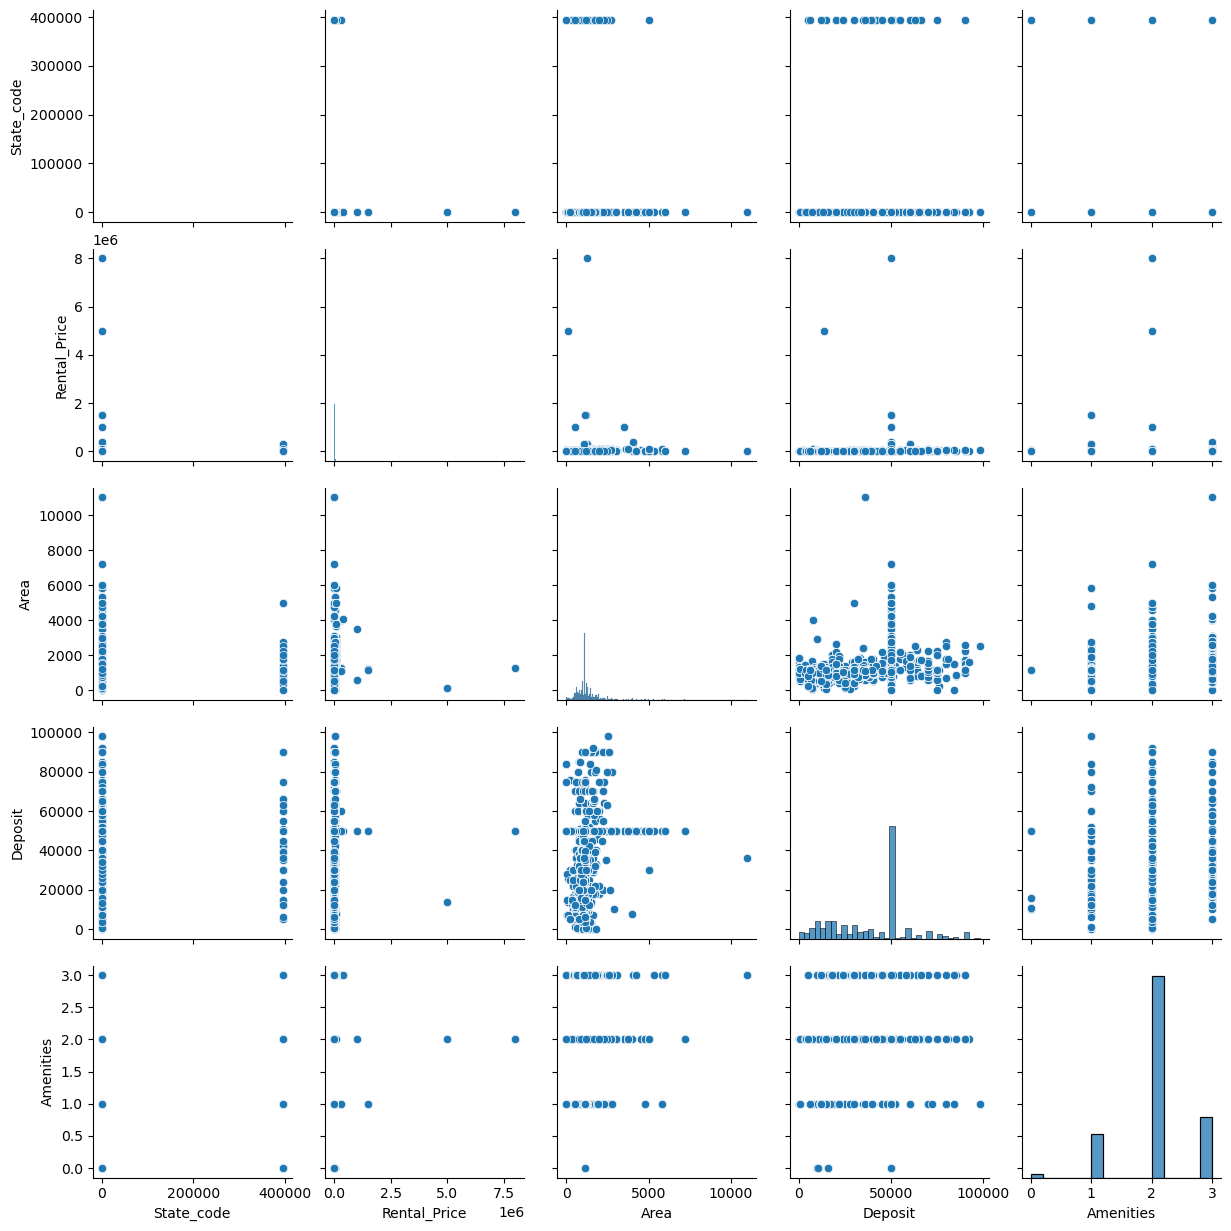

In [93]:
#Checking the pairwise relation between the features and label
sns.pairplot(df)
plt.show()

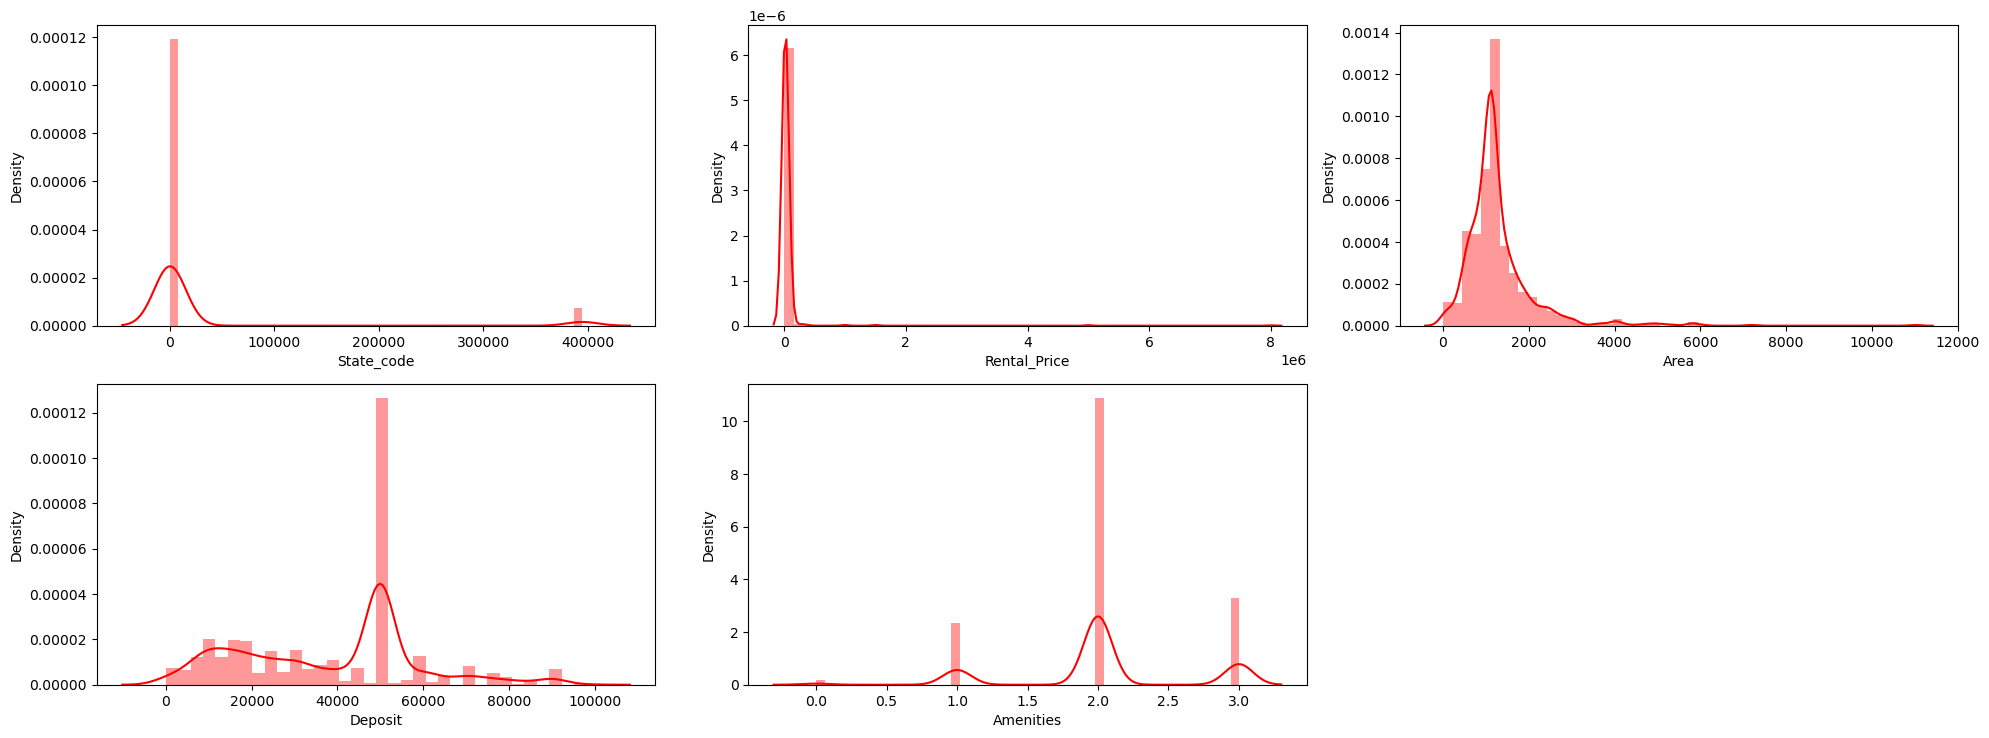

In [94]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="r")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

## OUTIER DETECTION AND TREATMENT

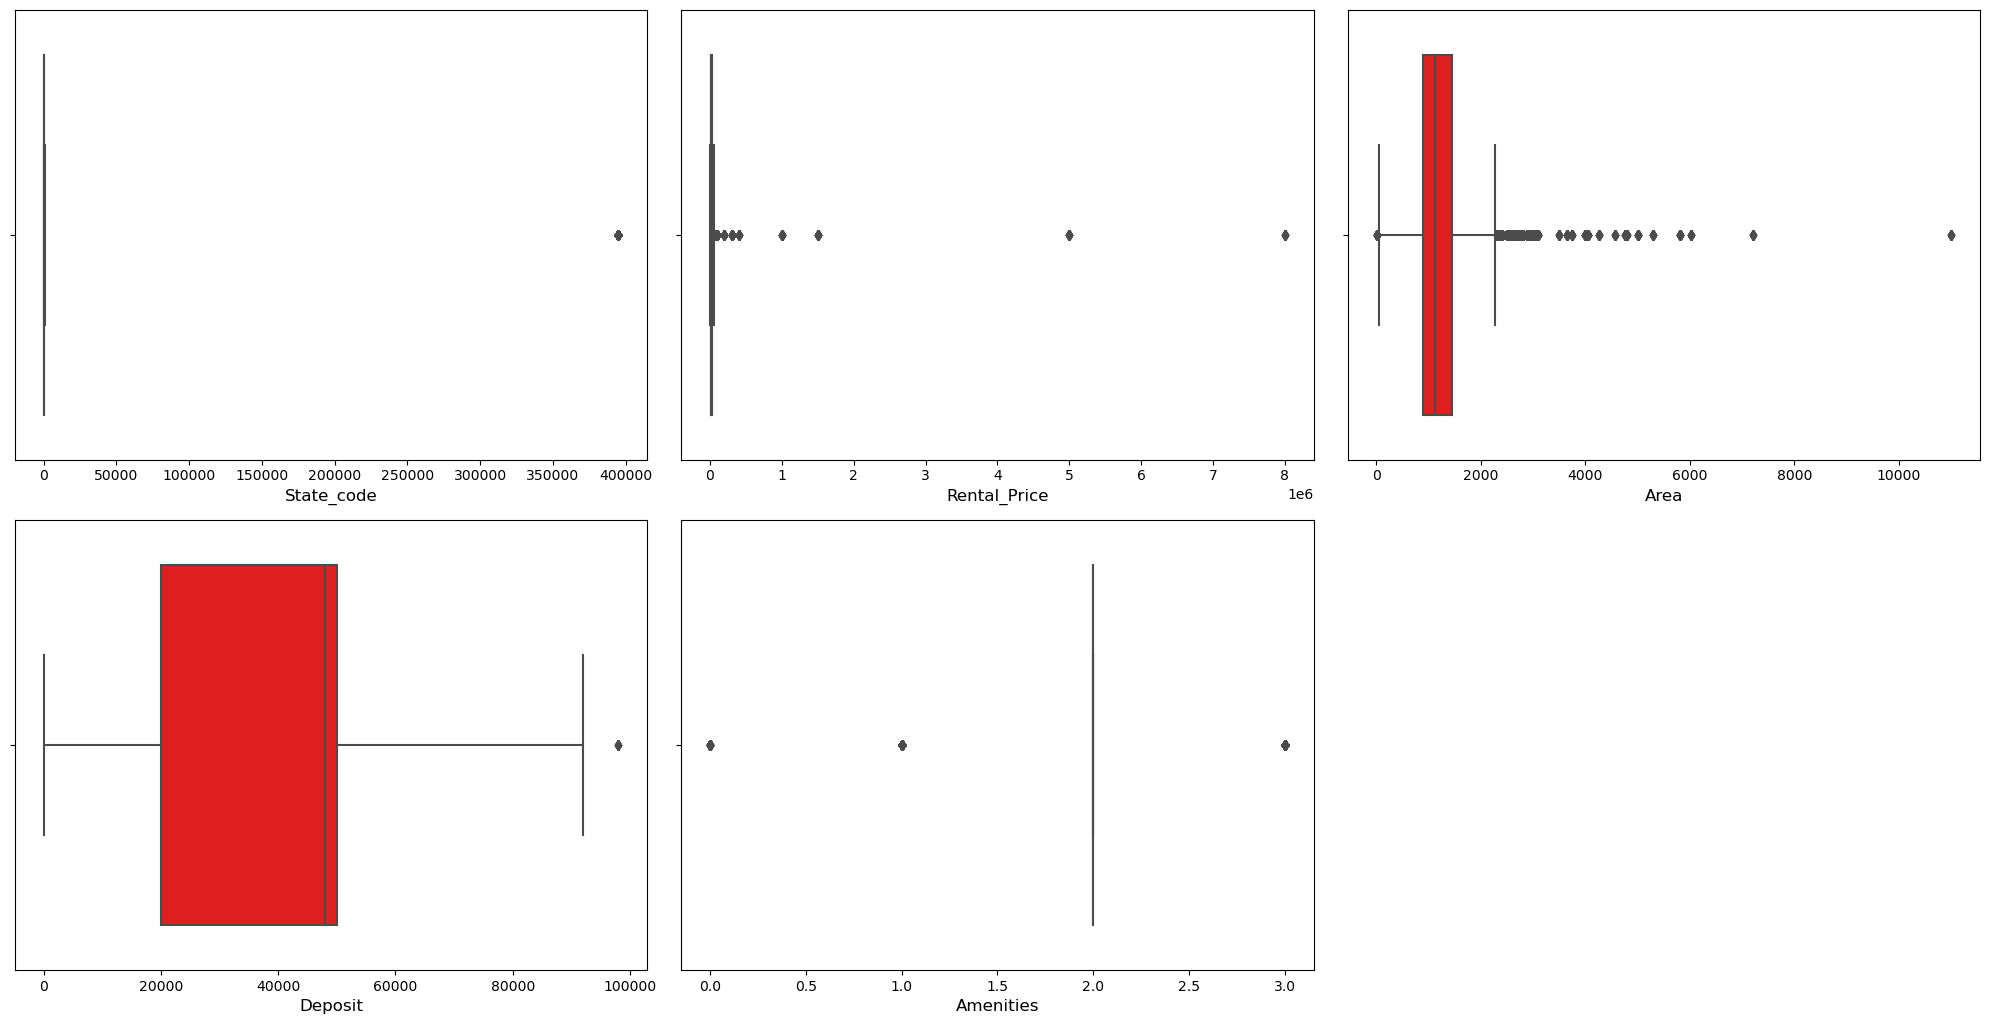

In [95]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,15))
plotnumber=1
for col in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=col, data=df,color='red')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [96]:
# Calculate the z-scores for the specified numerical columns
df_columns=['Amenities','Deposit','Area','Rental_Price']

# Calculate the z-scores for the specified numerical columns
z = np.abs(zscore(df[df_columns]))

# Create a new DataFrame df1 with rows where z-scores are less than 3 for all numerical columns
df1 = df[(z < 3).all(axis=1)]
df1.shape

(8428, 8)

In [97]:
# checking the data loss for zscore
data_loss_zscore = (10437-10382)/10437*100
print('Dataloss using zscore:',data_loss_zscore)

Dataloss using zscore: 0.5269713519210502


## CHECKING SKEWNESS

In [98]:
df.skew()

State_code       3.732164
Rental_Price    18.473044
No_of_beds       0.577395
No_of_baths      1.199518
Area             3.842366
Deposit          0.125458
Amenities       -0.296576
dtype: float64

-skewness more than +/- 0.5 will be treated.

-Rental_price and Area columns will not be treated as they are our target columns.

-In state_code No_of_baths, data seems to be skewed.

-we will not treat state_code as it is numercial column/ thus we will only treat no_of_baths.



In [99]:
# Removing skewness using yeo-johnson  method to get better prediction

from sklearn.preprocessing import power_transform

df[['No_of_baths']]=power_transform(df[['No_of_baths']])

In [100]:
df.skew()

State_code       3.732164
Rental_Price    18.473044
No_of_beds       0.577395
No_of_baths     -0.000093
Area             3.842366
Deposit          0.125458
Amenities       -0.296576
dtype: float64

###### skewness is removed except from our target columns

## ENCODING CATEGORICAL COLUMNS

In [101]:
# Initating Label Encoder
le = LabelEncoder()

#Iterate over Categorical columns
for i in cat_col:
    df[i] = le.fit_transform(df[i])

df.head()

,City,State_code,Rental_Price,No_of_beds,No_of_baths,Area,Deposit,Amenities
0,3,7,200000.0,3,1,1125,50000.0,1.0
1,3,7,45000.0,3,2,1850,90000.0,2.0
2,3,7,35000.0,2,2,1600,70000.0,3.0
3,3,7,20000.0,0,0,365,16000.0,2.0
4,3,7,45000.0,1,1,1125,90000.0,2.0


## CORRELATION

In [102]:
df_cor = df.corr()
df_cor

,City,State_code,Rental_Price,No_of_beds,No_of_baths,Area,Deposit,Amenities
City,1.000000,0.416594,-0.040654,-0.083650,-0.096436,-0.047172,-0.101419,0.035283
State_code,0.416594,1.000000,-0.014561,0.049510,0.037851,0.028242,0.078965,-0.004031
Rental_Price,-0.040654,-0.014561,1.000000,0.066426,0.015690,-0.007728,0.018795,-0.013761
No_of_beds,-0.083650,0.049510,0.066426,1.000000,0.831185,0.532181,0.304686,0.161302
No_of_baths,-0.096436,0.037851,0.015690,0.831185,1.000000,0.594285,0.308208,0.181792
Area,-0.047172,0.028242,-0.007728,0.532181,0.594285,1.000000,0.241371,0.158650
Deposit,-0.101419,0.078965,0.018795,0.304686,0.308208,0.241371,1.000000,0.095191
Amenities,0.035283,-0.004031,-0.013761,0.161302,0.181792,0.158650,0.095191,1.000000


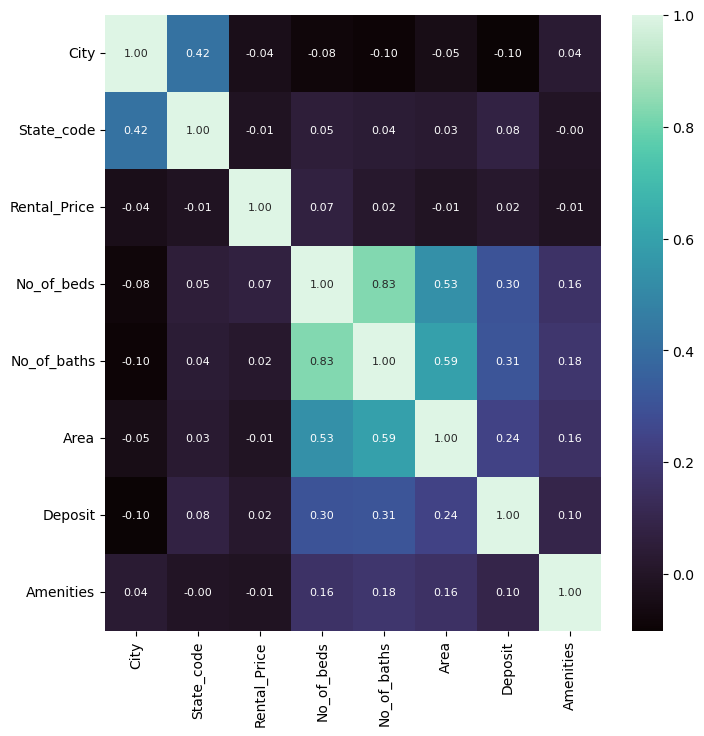

In [103]:
# Visualizing it
plt.figure(figsize=(8, 8))
sns.heatmap(df_cor, annot=True, fmt='.2F', cmap='mako', annot_kws={"size": 8})
plt.show()

We have duplicated our dataset, with the original being referred to as 'df' for Price analysis, and the duplicate named 'df1' for Rating analysis. This separation allows us to work on two distinct target variables: capacity and primary fuel.

In [104]:
# Copying dataframe
df1 = df.copy()

### CORRELATION WITH OUR FIRST TARGET RENTAL_PRICE

In [105]:
#correlation with target column
correlation_with_price = df.corr()['Rental_Price'].abs().sort_values(ascending=False)
correlation_with_price

Rental_Price    1.000000
No_of_beds      0.066426
City            0.040654
Deposit         0.018795
No_of_baths     0.015690
State_code      0.014561
Amenities       0.013761
Area            0.007728
Name: Rental_Price, dtype: float64

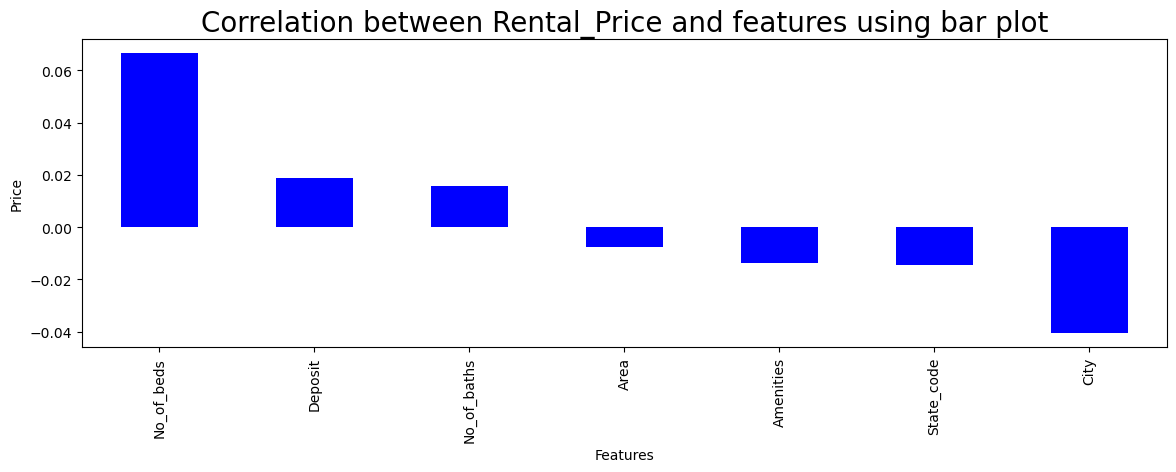

In [106]:
plt.figure(figsize=(14,4))
df.corr()['Rental_Price'].sort_values(ascending=False).drop(['Rental_Price']).plot(kind='bar',color='blue')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.title('Correlation between Rental_Price and features using bar plot',fontsize=20)
plt.show()

OBSERVATIONS :

-There is a moderate positive correlation between "Price" and "no of beds." This suggests that properties with more bedrooms have higher rents.

-There is a moderate positive correlation between "Price" and "city" This indicates that cities may be associated with higher-rent properties.

-There is a positive correlation between "Price" and "deposit"

-There is a positive correlation between "Price" and "no_of_baths" indicating that certain properties may be associated with more no of baths.

-slightly weak relation btw price and area.

### CORRELATION WITH OUR SECOND TARGET AREA

In [107]:
#correlation with target column
correlation_with_rating = df1.corr()['Area'].abs().sort_values(ascending=False)
correlation_with_rating

Area            1.000000
No_of_baths     0.594285
No_of_beds      0.532181
Deposit         0.241371
Amenities       0.158650
City            0.047172
State_code      0.028242
Rental_Price    0.007728
Name: Area, dtype: float64

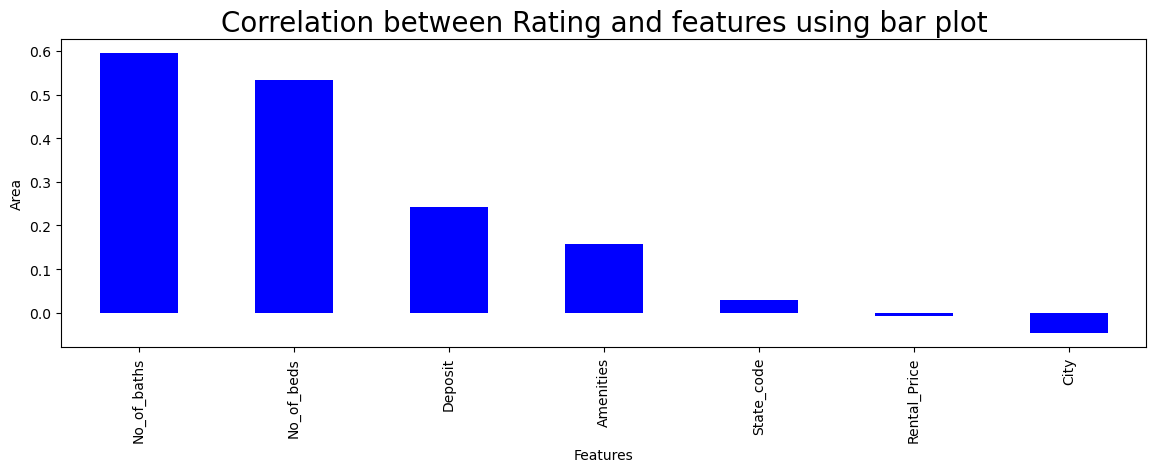

In [108]:
plt.figure(figsize=(14,4))
df1.corr()['Area'].sort_values(ascending=False).drop(['Area']).plot(kind='bar',color='blue')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Area',fontsize=10)
plt.title('Correlation between Rating and features using bar plot',fontsize=20)
plt.show()

Observations:

Area is positively corellated with no_of_baths and no_of_beds suggesting that properties with larger areas are having more no of baths and beds. Area has weak crorelation with price

# MODEL BUILDING

## Data splitting for features and label

### 1. for first target Rental_price

In [110]:
# Splitting data in target and dependent feature
X = df.drop(['Rental_Price'], axis =1)
Y = df['Rental_Price']

# Checking the dimenstion of X & Y
X.shape, Y.shape

((8768, 7), (8768,))

### 1. for second target Area

In [111]:
# Splitting data in target and dependent feature
X1 = df1.drop(['Area'], axis =1)
Y1 = df1['Area']

# Checking the dimenstion of X & Y
X1.shape, Y1.shape

((8768, 7), (8768,))

### Features scaling for Rental_price

In [112]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X_scale = scaler.fit_transform(X)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df = pd.DataFrame(X_scale, columns=X.columns)
scaled_df

,City,State_code,No_of_beds,No_of_baths,Area,Deposit,Amenities
0,-0.903595,-0.252980,1.994951,-0.185055,-0.188006,0.567329,-1.681586
1,-0.903595,-0.252980,1.994951,0.932410,0.660848,2.487824,-0.056349
2,-0.903595,-0.252980,0.853193,0.932410,0.368140,1.527576,1.568887
3,-0.903595,-0.252980,-1.430322,-1.302520,-1.077840,-1.065092,-0.056349
4,-0.903595,-0.252980,-0.288565,-0.185055,-0.188006,2.487824,-0.056349
...,...,...,...,...,...,...,...
8763,1.656701,3.982642,-0.288565,-1.302520,-0.451444,-0.392919,-0.056349
8764,1.656701,3.982642,-0.288565,-0.185055,-0.217277,0.327267,1.568887
8765,1.656701,3.982642,0.853193,0.932410,0.836473,1.767638,-0.056349
8766,1.656701,3.982642,-0.288565,-0.185055,-0.135318,-0.392919,-0.056349


### Features scaling for Area

In [113]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X1_scale = scaler.fit_transform(X1)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df1 = pd.DataFrame(X1_scale, columns=X1.columns)
scaled_df1

,City,State_code,Rental_Price,No_of_beds,No_of_baths,Deposit,Amenities
0,-0.903595,-0.252980,0.434038,1.994951,-0.185055,0.567329,-1.681586
1,-0.903595,-0.252980,-0.009133,1.994951,0.932410,2.487824,-0.056349
2,-0.903595,-0.252980,-0.037724,0.853193,0.932410,1.527576,1.568887
3,-0.903595,-0.252980,-0.080612,-1.430322,-1.302520,-1.065092,-0.056349
4,-0.903595,-0.252980,-0.009133,-0.288565,-0.185055,2.487824,-0.056349
...,...,...,...,...,...,...,...
8763,1.656701,3.982642,-0.080612,-0.288565,-1.302520,-0.392919,-0.056349
8764,1.656701,3.982642,-0.080612,-0.288565,-0.185055,0.327267,1.568887
8765,1.656701,3.982642,-0.080612,0.853193,0.932410,1.767638,-0.056349
8766,1.656701,3.982642,-0.080612,-0.288565,-0.185055,-0.392919,-0.056349


## Imbalance data

In [114]:
# Checking unique values of our 2nd target which is Primary Fuel
Y1.value_counts()

1125    1532
1200     367
1000     360
1100     253
1500     218
        ... 
1595       9
515        9
1202       9
1759       9
988        9
Name: Area, Length: 249, dtype: int64

In [115]:
# Initiate over-sampler
sm=SMOTE()

X1,Y1=sm.fit_resample(X1,Y1)

In [116]:
# Checking unique values of our 2nd target after applying SMOTE
Y1.value_counts()

1125     1532
1016     1532
11000    1532
1651     1532
717      1532
         ... 
1732     1532
420      1532
1325     1532
988      1532
1170     1532
Name: Area, Length: 249, dtype: int64

now we have equal values for target rating

## MULTICOLLINEARITY

### Multicollinearity for our first target Rental_Price

In [117]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.252474,City
1,1.238447,State_code
2,3.286076,No_of_beds
3,3.653991,No_of_baths
4,1.570887,Area
5,1.142620,Deposit
6,1.045221,Amenities


### Multicollinearity for our first target Area

In [118]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1_scale,i) for i in range(len(X1.columns))]
vif["Features"] = X1.columns
vif

,VIF values,Features
0,1.253455,City
1,1.238406,State_code
2,1.011393,Rental_Price
3,3.295892,No_of_beds
4,3.316323,No_of_baths
5,1.137398,Deposit
6,1.041912,Amenities


OBSERVATION : The Variance Inflation Factor (VIF) values for the independent features are well below the threshold of 10, indicating low multicollinearity among the variables for our both DataFrame.

# MODEL SELECTION

## 1. ## MODEL SELECTION FOR RENTAL_PRICE

In [119]:
# Function to check for best random state and R2 score
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.20)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

In [120]:
# Initialize all the models
LR_model = LinearRegression()
RD_model = Ridge()
Lasso_model = Lasso()
DT_model = DecisionTreeRegressor()
SVR_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
GB_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
ADA_model= AdaBoostRegressor()


# Create a list of models for iteration
models = [
    (LR_model, 'Linear Regression'),
    (RD_model, 'Ridge'),
    (Lasso_model, 'Lasso'),
    (DT_model, 'Decision Tree'),
    (SVR_model, 'SVR'),
    (KNR_model, 'KNeighbors'),
    (RFR_model, 'RandomForest'),
    (SGH_model, 'SGDRegressor'),
    (Bag_model, 'Bagging Regressor'),
    (GB_model, 'GradientBoostingRegressor'),
    (XGB_model, 'XGBRegressor'),
    (ADA_model, 'AdaBoostRegressor')
]

In [121]:
# Create a DataFrame to store the results
results = []

# Iterate through models and calculate the best random state, R2 score, MSE, and MAE
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, X_scale, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=best_random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best R2 Score': max_r2,
        'Best Random State': best_random_state,
        'MSE': mse,
        'MAE': mae,
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df

,Model,Best R2 Score,Best Random State,MSE,MAE
5,KNeighbors,0.998004,42,3.438632e+08,1589.561117
8,Bagging Regressor,0.997755,42,4.712965e+08,1465.255321
6,RandomForest,0.997447,42,4.728732e+08,1519.202996
3,Decision Tree,0.997281,42,4.682316e+08,1482.259744
10,XGBRegressor,0.997196,42,4.829630e+08,2975.843461
9,GradientBoostingRegressor,0.977945,2,2.130594e+09,18030.702623
11,AdaBoostRegressor,0.972780,60,6.909951e+09,28275.659742
0,Linear Regression,0.017727,99,8.877811e+10,54526.368254
2,Lasso,0.017727,99,8.877812e+10,54524.787140
1,Ridge,0.017726,99,8.877821e+10,54518.889732


In [122]:
sorted_results_df.head(2)

,Model,Best R2 Score,Best Random State,MSE,MAE
5,KNeighbors,0.998004,42,3.438632e+08,1589.561117
8,Bagging Regressor,0.997755,42,4.712965e+08,1465.255321


## MODEL SELECTION FOR AREA

In [134]:
# Function to check for best random state and R2 score
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.20)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

In [131]:
# Initialize all the classification models
LR_model = LogisticRegression()
Ridge_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
SDG_model = SGDClassifier()
BG_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (ET_model, "ExtraTrees Classifier"),
    (Ridge_model, "RidgeClassifier"),
    (SDG_model, "SGDClassifier"),
    (BG_model, "BaggingClassifier"),
    (ADA_model, "AdaBoostClassifier"),
]

In [135]:
# Create a DataFrame to store the results
results = []

# Iterate through models and calculate the best random state, R2 score, MSE, and MAE
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, X1_scale, Y1)
    X_train, X_test, y_train, y_test = train_test_split(X1_scale, Y1, test_size=0.2, random_state=best_random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best R2 Score': max_r2,
        'Best Random State': best_random_state,
        'MSE': mse,
        'MAE': mae,
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df1 = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df1

,Model,Best R2 Score,Best Random State,MSE,MAE
5,KNeighbors,0.998004,42,3.438632e+08,1589.561117
8,Bagging Regressor,0.997456,42,4.295333e+08,1439.365150
6,RandomForest,0.997321,42,4.659969e+08,1507.974464
3,Decision Tree,0.997280,42,4.681358e+08,1479.979243
10,XGBRegressor,0.997196,42,4.829630e+08,2975.843461
9,GradientBoostingRegressor,0.977945,2,2.130594e+09,18030.702623
11,AdaBoostRegressor,0.966139,64,5.481003e+09,24219.917360
7,SGDRegressor,0.021077,99,8.863459e+10,51231.421764
0,Linear Regression,0.017727,99,8.877811e+10,54526.368254
2,Lasso,0.017727,99,8.877812e+10,54524.787140


In [137]:
sorted_results_df1.head(2)

,Model,Best R2 Score,Best Random State,MSE,MAE
5,KNeighbors,0.998004,42,3.438632e+08,1589.561117
8,Bagging Regressor,0.997456,42,4.295333e+08,1439.365150


# SAVING BEST MODEL

## i. SAVING MODEL FOR RENTAL_Price

In [ ]:
filename = 'rental_price_model.pkl'
pickle.dump(best_rf, open(filename, 'wb')) 

## i. SAVING MODEL FOR AREA

In [ ]:
filename = 'rental_area_model.pkl'
pickle.dump(best_et, open(filename, 'wb')) 